/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


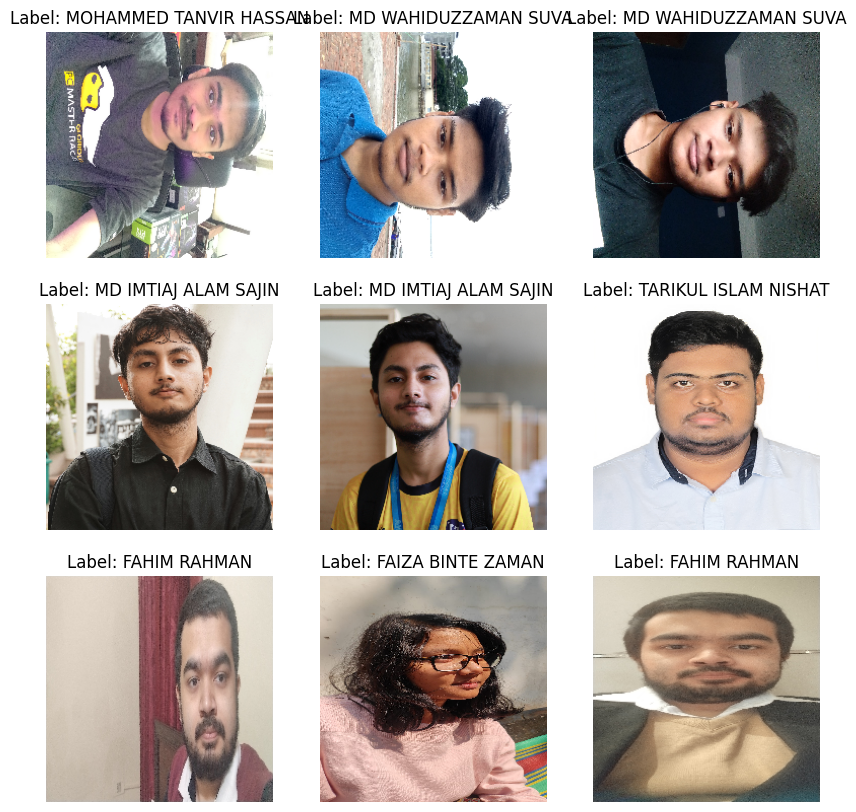

3/3 [==============================] - 0s 115ms/step
Epoch 1/10
12/12 [==============================] - 1s 21ms/step - loss: 3.4155 - accuracy: 0.1108 - val_loss: 3.0151 - val_accuracy: 0.2842
Epoch 2/10
12/12 [==============================] - 0s 8ms/step - loss: 2.6662 - accuracy: 0.4301 - val_loss: 2.4492 - val_accuracy: 0.4842
Epoch 3/10
12/12 [==============================] - 0s 9ms/step - loss: 2.0086 - accuracy: 0.6174 - val_loss: 2.0214 - val_accuracy: 0.5789
Epoch 4/10
12/12 [==============================] - 0s 8ms/step - loss: 1.5423 - accuracy: 0.7757 - val_loss: 1.6444 - val_accuracy: 0.6842
Epoch 5/10
12/12 [==============================] - 0s 9ms/step - loss: 1.1383 - accuracy: 0.8892 - val_loss: 1.3587 - val_accuracy: 0.7789
Epoch 6/10
12/12 [==============================] - 0s 9ms/step - loss: 0.8213 - accuracy: 0.9499 - val_loss: 1.1207 - val_accuracy: 0.8105
Epoch 7/10
12/12 [==============================] - 0s 10ms/step - loss: 0.5998 - accuracy: 0.9683 - val_l

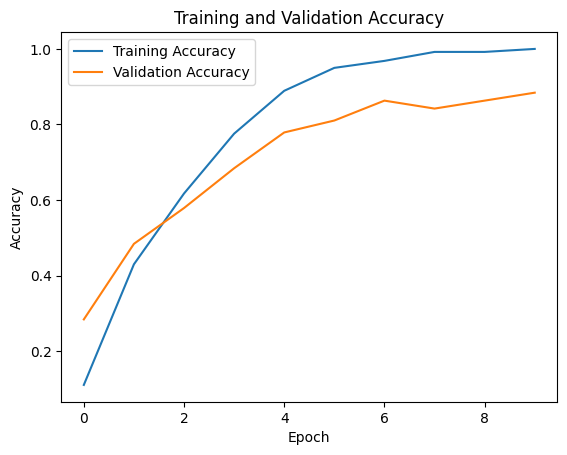

3/3 [==============================] - 0s 6ms/step - loss: 0.6732 - accuracy: 0.8842
Test accuracy: 0.8842105269432068
3/3 [==============================] - 0s 4ms/step
CNN confusion matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]


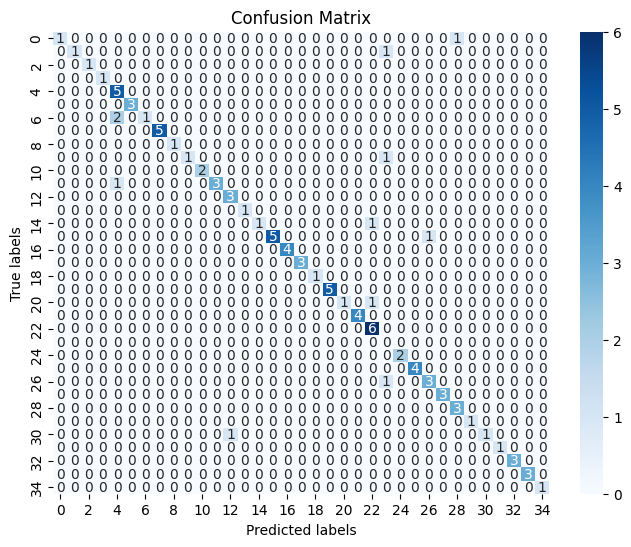

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 42ms/step


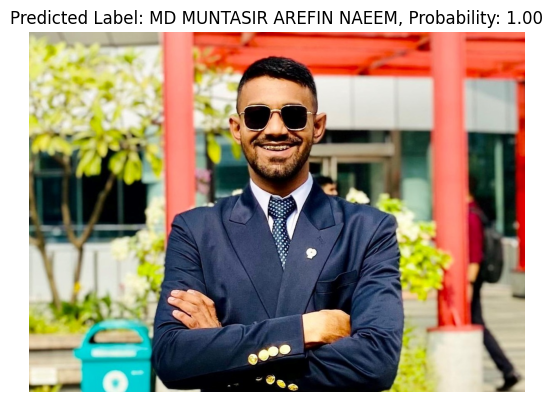

In [18]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import img_to_array, load_img
import pickle
from sklearn.model_selection import StratifiedKFold

# Define the directory that contains the images
image_dir = '/content/drive/MyDrive/CVPR project/new'

# Define the CSV file containing the image labels
label_file = '/content/drive/MyDrive/CVPR project/sample_Label.csv'

# Define the image size
img_size = (224, 224)

# Define a function to preprocess the images
def preprocess_images(dir_path, label_file, img_size):
    images = []
    labels = []

    # Load image labels from CSV file
    labels_df = pd.read_csv(label_file)
    label_dict = dict(zip(labels_df['image'], labels_df['level']))

    # Get the list of image file names
    file_names = os.listdir(dir_path)

    # Create an empty NumPy array to store the preprocessed images
    preprocessed_images = np.empty((len(file_names), img_size[0], img_size[1], 3))

    # Loop over the image file names and preprocess each image
    for i, file_name in enumerate(file_names):
        if file_name in label_dict:
            # Load the image
            img_path = os.path.join(dir_path, file_name)
            image = load_img(img_path, target_size=img_size)
            image = img_to_array(image)
            images.append(image)
            # Get label
            label = label_dict[file_name]
            labels.append(label)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Save the preprocessed images and labels using pickle
    with open('preprocessed_data.pkl', 'wb') as f:
        pickle.dump((images, labels), f)

    return images, labels

# Load and preprocess images and labels
images, labels = preprocess_images(image_dir, label_file, img_size)

# Normalize images
images = images / 255.0

# Perform one-hot encoding on labels
labels = to_categorical(labels)


label_names = {
    0: 'MD MUNTASIR AREFIN NAEEM',
    1: 'SRABONE RAXIT',
    2: 'SYEDA HUMAIRA JABEEN',
    3: 'BISHANATH TARAFDER',
    4: 'AHMED IMTIAZ',
    5: 'FAIZA BINTE ZAMAN',
    6: 'FAHIM RAHMAN',
    7: 'ESM-E MOULA CHOWDHURY ABHA',
    8: 'MOHAMMED TANVIR HASSAN',
    9: 'MD SAJID ISLAM KHAN',
    10: 'TARIKUL ISLAM NISHAT',
    11: 'S M FAISAL',
    12: 'MOHAMMAD BIN AB JALIL SHEAKH',
    13: 'AL-NAFI',
    14: 'MOHAMMAD NUR',
    15: 'MD JAHID HASSAN',
    16: 'MD NAIMUR RAHMAN',
    17: 'NAVID MAHFUZ NAYEEM',
    18: 'NAVID MAHFUZ NAYEEM',
    19: 'REZWAN AHMAD',
    20: 'ABDULLAH AL SHAHRIAR',
    21: 'IMAM HASAN JAMI',
    22: 'MD FARDIN AMIN RIYAD',
    23: 'MD ATIK ULLAH KHAN',
    24: 'TAHFIM IBN KHAN',
    25: 'TAHMID AL RAFID SIDDIQUE',
    26: 'MD SHANZID HASAN',
    27: 'MD TOYABUR RAHAMAN',
    28: 'SADAT BIN MASUD',
    29: 'RAHAD-UL-ISLAM RABBY',
    30: 'SATYAJIT DAS',
    31: 'SHEIKH AKIB ALMAS',
    32: 'MD TAREK MAHMUD',
    33: 'ASHIK AHAMED',
    34: 'MD WAHIDUZZAMAN SUVA',
    35: 'NAFIS MUBASSHIR SHAH',
    36: 'MD IMTIAJ ALAM SAJIN',


}

# Define the number of folds for cross-validation
num_folds = 5

# Perform k-fold cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_accuracy = []

for fold, (train_index, val_index) in enumerate(skf.split(images, np.argmax(labels, axis=1))):
    print(f'Fold {fold + 1}/{num_folds}')

# Visualize some sample images with their corresponding names
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    label_num = np.argmax(y_train[i])  # Get the numerical label
    label_name = label_names[label_num]  # Convert numerical label to name
    plt.title(f'Label: {label_name}')
    plt.axis('off')
plt.show()

# Extract features using pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
X_train_features = base_model.predict(X_train)
X_test_features = base_model.predict(X_test)

# Reshape the features for feeding to CNN model
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)

# Normalize the data
X_train_norm = X_train_features / X_train_features.max()
X_test_norm = X_test_features / X_train_features.max()

# Train and evaluate the CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_norm.shape[1],)))
    model.add(Dense(37, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()
history = model.fit(X_train_norm, y_train, epochs=10, batch_size=32, validation_data=(X_test_norm, y_test))

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_norm, y_test)
print('Test accuracy:', test_acc)

# Predict classes
y_pred = model.predict(X_test_norm)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cnn_cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Print confusion matrix
print("CNN confusion matrix:")
print(cnn_cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Save the model
model.save('attendance_recognition_model.h5')

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import img_to_array, load_img

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load the saved model for attendance recognition
try:
    model = load_model('attendance_recognition_model.h5')
except Exception as e:
    print("Error loading the model:", e)

# Function to preprocess the input image
def preprocess_image(image_path, img_size=(224, 224)):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# Function to predict label from input image
def predict_label(image_path):
    preprocessed_img = preprocess_image(image_path)
    features = base_model.predict(preprocessed_img)
    features = features.reshape(features.shape[0], -1)
    predicted_probabilities = model.predict(features)[0]
    predicted_class = np.argmax(predicted_probabilities)
    predicted_probability = np.max(predicted_probabilities)
    return predicted_class, predicted_probability

# Define a dictionary mapping class numbers to label names
label_names = {
    0: 'MD MUNTASIR AREFIN NAEEM',
    1: 'SRABONE RAXIT',
    2: 'SYEDA HUMAIRA JABEEN',
    3: 'BISHANATH TARAFDER',
    4: 'AHMED IMTIAZ',
    5: 'FAIZA BINTE ZAMAN',
    6: 'FAHIM RAHMAN',
    7: 'ESM-E MOULA CHOWDHURY ABHA',
    8: 'MOHAMMED TANVIR HASSAN',
    9: 'MD SAJID ISLAM KHAN',
    10: 'TARIKUL ISLAM NISHAT',
    11: 'S M FAISAL',
    12: 'MOHAMMAD BIN AB JALIL SHEAKH',
    13: 'AL-NAFI',
    14: 'MOHAMMAD NUR',
    15: 'MD JAHID HASSAN',
    16: 'MD NAIMUR RAHMAN',
    17: 'NAVID MAHFUZ NAYEEM',
    18: 'NAVID MAHFUZ NAYEEM',
    19: 'REZWAN AHMAD',
    20: 'ABDULLAH AL SHAHRIAR',
    21: 'IMAM HASAN JAMI',
    22: 'MD FARDIN AMIN RIYAD',
    23: 'MD ATIK ULLAH KHAN',
    24: 'TAHFIM IBN KHAN',
    25: 'TAHMID AL RAFID SIDDIQUE',
    26: 'MD SHANZID HASAN',
    27: 'MD TOYABUR RAHAMAN',
    28: 'SADAT BIN MASUD',
    29: 'RAHAD-UL-ISLAM RABBY',
    30: 'SATYAJIT DAS',
    31: 'SHEIKH AKIB ALMAS',
    32: 'MD TAREK MAHMUD',
    33: 'ASHIK AHAMED',
    34: 'MD WAHIDUZZAMAN SUVA',
    35: 'NAFIS MUBASSHIR SHAH',
    36: 'MD IMTIAJ ALAM SAJIN',


}


# Path to the image you want to predict
image_path = '/content/drive/MyDrive/CVPR project/MD MUNTASIR AREFIN NAEEM.jpg'

# Predict label for the image
predicted_label, predicted_probability = predict_label(image_path)

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the label name based on the predicted class
predicted_label_name = label_names.get(predicted_label, 'Unknown')

# Visualize the image with the predicted label and probability
plt.imshow(image)
plt.title(f'Predicted Label: {predicted_label_name}, Probability: {predicted_probability:.2f}')
plt.axis('off')
plt.show()





